In [31]:
import pandas as pd
import numpy as np

df = pd.read_csv("/Users/balmukundmishra/Desktop/2025-Learning/Eye_Disease_Detection_MTL/Preprocessed_Data/Diesease_grading/Groundtruths/train_grading.csv")
df.head()

,Image name,Retinopathy grade,Risk of macular edema,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,IDRiD_001,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IDRiD_002,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IDRiD_003,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IDRiD_004,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,IDRiD_005,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
df.columns

Index(['Image name', 'Retinopathy grade', 'Risk of macular edema ',
       'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7',
       'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11'],
      dtype='object')

In [33]:
df = df[['Image name', 'Retinopathy grade', 'Risk of macular edema ']]

In [57]:
## lets group the collum 'Retinopathy grade' as range 0-2, 2 , 3-4
def group_retinopathy_grade(grade):
    if grade in [0, 1]:
        return 'low'
    elif grade == 2:
        return 'midium'
    elif grade in [3, 4]:
        return 'high'
    else:
        return 'Unknown'
df['Retinopathy_grade_group'] = df['Retinopathy grade'].apply(group_retinopathy_grade)

In [58]:
df['Retinopathy grade'].unique()

array([3, 2, 4, 1, 0])

In [59]:
df['Risk of macular edema '].unique()

array([2, 0, 1])

In [60]:
df['is_edema'] = df['Risk of macular edema '].apply(lambda x: 0 if x == 0 else 1)


In [61]:
df

,Image name,Retinopathy grade,Risk of macular edema,is_edema,Retinopathy_grade_group
0,IDRiD_001,3,2,1,high
1,IDRiD_002,3,2,1,high
2,IDRiD_003,2,2,1,midium
3,IDRiD_004,3,2,1,high
4,IDRiD_005,4,0,0,high
...,...,...,...,...,...
408,IDRiD_409,2,1,1,midium
409,IDRiD_410,2,0,0,midium
410,IDRiD_411,2,0,0,midium
411,IDRiD_412,2,0,0,midium


In [62]:
summary = df.groupby('Retinopathy_grade_group')['is_edema'].value_counts().unstack().fillna(0)
summary.columns = ['No Edema','Edema']  # if values are 0 and 1
print(summary)


                         No Edema  Edema
Retinopathy_grade_group                 
high                          7.0  116.0
low                         154.0    0.0
midium                       16.0  120.0


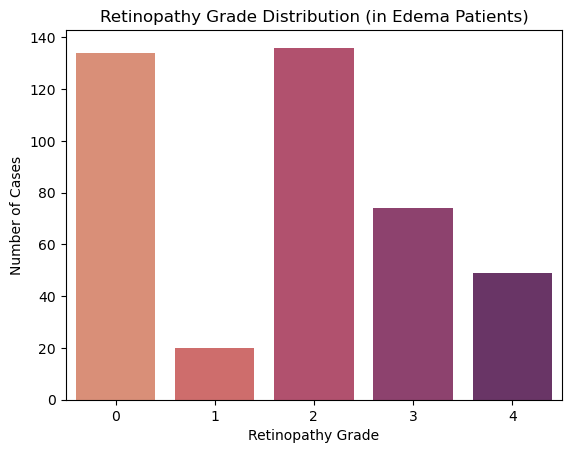

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Retinopathy grade', palette='flare')
plt.title("Retinopathy Grade Distribution (in Edema Patients)")
plt.xlabel("Retinopathy Grade")
plt.ylabel("Number of Cases")
plt.show()

In [65]:
# lets write this data into csv
df.to_csv("/Users/balmukundmishra/Desktop/2025-Learning/Eye_Disease_Detection_MTL/Preprocessed_Data/classification/train/processed_csv_train.csv", index=False)

In [10]:
import os
import re

def pad_idrid_with_suffix(name):
    """
    Convert IDRiD_01_MA.tif → IDRiD_001_MA.tif
    """
    base, ext = os.path.splitext(name)
    ext = ext.lower()
    match = re.match(r"(IDRiD_)(\d{1,2})(_.+)", base)
    if match and ext == ".tif":
        prefix = match.group(1)
        number = int(match.group(2))
        suffix = match.group(3)
        new_name = f"{prefix}{number:03d}{suffix}{ext}"
        return new_name
    return None

def rename_files_in_directory(directory):
    renamed = 0
    for filename in os.listdir(directory):
        new_name = pad_idrid_with_suffix(filename)
        if new_name and new_name != filename:
            src = os.path.join(directory, filename)
            dst = os.path.join(directory, new_name)
            os.rename(src, dst)
            print(f"✅ Renamed: {filename} → {new_name}")
            renamed += 1
    print(f"\nDone. Total files renamed: {renamed}")

if __name__ == "__main__":
    path = "/Users/balmukundmishra/Desktop/2025-Learning/Eye_Disease_Detection_MTL/data/idrid/Segmentation/2. All Segmentation Groundtruths/a. Training Set/5. Optic Disc"
    rename_files_in_directory(path)


✅ Renamed: IDRiD_52_OD.tif → IDRiD_052_OD.tif
✅ Renamed: IDRiD_31_OD.tif → IDRiD_031_OD.tif
✅ Renamed: IDRiD_40_OD.tif → IDRiD_040_OD.tif
✅ Renamed: IDRiD_23_OD.tif → IDRiD_023_OD.tif
✅ Renamed: IDRiD_15_OD.tif → IDRiD_015_OD.tif
✅ Renamed: IDRiD_19_OD.tif → IDRiD_019_OD.tif
✅ Renamed: IDRiD_07_OD.tif → IDRiD_007_OD.tif
✅ Renamed: IDRiD_21_OD.tif → IDRiD_021_OD.tif
✅ Renamed: IDRiD_42_OD.tif → IDRiD_042_OD.tif
✅ Renamed: IDRiD_33_OD.tif → IDRiD_033_OD.tif
✅ Renamed: IDRiD_50_OD.tif → IDRiD_050_OD.tif
✅ Renamed: IDRiD_05_OD.tif → IDRiD_005_OD.tif
✅ Renamed: IDRiD_17_OD.tif → IDRiD_017_OD.tif
✅ Renamed: IDRiD_09_OD.tif → IDRiD_009_OD.tif
✅ Renamed: IDRiD_13_OD.tif → IDRiD_013_OD.tif
✅ Renamed: IDRiD_01_OD.tif → IDRiD_001_OD.tif
✅ Renamed: IDRiD_37_OD.tif → IDRiD_037_OD.tif
✅ Renamed: IDRiD_54_OD.tif → IDRiD_054_OD.tif
✅ Renamed: IDRiD_29_OD.tif → IDRiD_029_OD.tif
✅ Renamed: IDRiD_25_OD.tif → IDRiD_025_OD.tif
✅ Renamed: IDRiD_46_OD.tif → IDRiD_046_OD.tif
✅ Renamed: IDRiD_03_OD.tif → IDRiD

In [2]:
import pandas as pd
import json

def generate_labels_json(csv_path, output_path):
    df = pd.read_csv(csv_path)

    # Drop extra empty columns and whitespace from headers
    df.columns = df.columns.str.strip()
    df["Image name"] = df["Image name"].str.strip()
    df["Retinopathy grade"] = df["Retinopathy grade"].astype(int)

    label_dict = {}
    for _, row in df.iterrows():
        image_name = row["Image name"].strip()
        grade = row["Retinopathy grade"]
        label_dict[f"{image_name}.jpg"] = grade

    # Save to JSON
    with open(output_path, "w") as f:
        json.dump(label_dict, f, indent=2)

    print(f"✅ labels.json written to: {output_path}")

# Example usage
csv_file = "/Users/balmukundmishra/Desktop/2025-Learning/Eye_Disease_Detection_MTL/Data/B. Disease Grading/Groundtruths/b. IDRiD_Disease Grading_Testing Labels.csv"
output_file = "/Users/balmukundmishra/Desktop/2025-Learning/Eye_Disease_Detection_MTL/Preprocessed_Data/classification/test/test_image_label_mapping.json"
generate_labels_json(csv_file, output_file)


✅ labels.json written to: /Users/balmukundmishra/Desktop/2025-Learning/Eye_Disease_Detection_MTL/Preprocessed_Data/classification/test/test_image_label_mapping.json


In [ ]:
## lets create our json for binary classifier [dynamic decision maker that if edema present = 1 or not present = ]

import pandas as pd
import json

def generate_labels_json(csv_path, output_path):
    df = pd.read_csv(csv_path)

    # Drop extra empty columns and whitespace from headers
    df.columns = df.columns.str.strip()
    df["Image name"] = df["Image name"].str.strip()
    df["is_edema"] = df["Retinopathy grade"].astype(int)

    label_dict = {}
    for _, row in df.iterrows():
        image_name = row["Image name"].strip()
        grade = row["Retinopathy grade"]
        label_dict[f"{image_name}.jpg"] = grade

    # Save to JSON
    with open(output_path, "w") as f:
        json.dump(label_dict, f, indent=2)

    print(f"✅ labels.json written to: {output_path}")

# Example usage
csv_file = "/Users/balmukundmishra/Desktop/2025-Learning/Eye_Disease_Detection_MTL/Data/B. Disease Grading/Groundtruths/b. IDRiD_Disease Grading_Testing Labels.csv"
output_file = "/Users/balmukundmishra/Desktop/2025-Learning/Eye_Disease_Detection_MTL/Preprocessed_Data/classification/test/binary_is_edema_mapping.json"
generate_labels_json(csv_file, output_file)


In [ ]:
Missing mask: /Users/balmukundmishra/Desktop/2025-Learning/Eye_Disease_Detection_MTL/data/idrid/Segmentation/2. All Segmentation Groundtruths/a. Training Set/4. Soft Exudates/IDRiD_053_ES.tif